# Revisão de código 

Olá! 

Meu nome é Suelen. Estou feliz em revisar seu projeto hoje!

Quando vejo um erro pela primeira vez, apenas aponto. Deixarei você encontrá-lo e corrigi-lo sozinho. Além disso, ao longo do texto, farei algumas observações sobre melhorias no código e também farei comentários sobre suas percepções sobre o assunto. Mas se você ainda não consegue lidar com essa tarefa, darei uma dica mais precisa na próxima iteração e também alguns exemplos práticos. Estarei aberta a feedbacks e discussões sobre o tema.

Você pode encontrar meus comentários em caixas verdes, amarelas ou vermelhas como estas:


<div class="alert alert-block alert-success">
<b>Comentário: </b> <a class="tocSkip"></a>

Sucesso. Tudo está correto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentário: </b> <a class="tocSkip"></a>

Observações. Algumas recomendações.
</div>

<div class="alert alert-block alert-danger">

<b>Comentário: </b> <a class="tocSkip"></a>

O bloco requer algumas correções. O trabalho não pode ser aceito com os comentários vermelhos.
</div>

Você pode me responder usando isto:

<div class="alert alert-block alert-info">
  Resposta <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-success">
<b>Comentário geral: </b> <a class="tocSkip"></a>

Parabéns pela conclusão do projeto, Pedro!👏🚀

O seu trabalho demonstra alta qualidade, com código bem estruturado e comentários relevantes em cada etapa.  Adicionei apenas algumas sugestões que podem contribuir para elevar ainda mais a qualidade do projeto.

O projeto está aprovado! Continue com o excelente trabalho!

</div>

In [1]:
# Importando pandas
import pandas as pd

# Manipulação e análise de dados
import numpy as np

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns

# Estatística e testes de hipóteses
from scipy import stats

In [2]:
# lendo o arquivo e armazenando em df
df = pd.read_csv('/datasets/games.csv')

# obtendo as 10 primeiras 10 linhas da tabela df
print(df.head(10))


                        Name Platform  Year_of_Release         Genre  \
0                 Wii Sports      Wii           2006.0        Sports   
1          Super Mario Bros.      NES           1985.0      Platform   
2             Mario Kart Wii      Wii           2008.0        Racing   
3          Wii Sports Resort      Wii           2009.0        Sports   
4   Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
5                     Tetris       GB           1989.0        Puzzle   
6      New Super Mario Bros.       DS           2006.0      Platform   
7                   Wii Play      Wii           2006.0          Misc   
8  New Super Mario Bros. Wii      Wii           2009.0      Platform   
9                  Duck Hunt      NES           1984.0       Shooter   

   NA_sales  EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     41.36     28.96      3.77         8.45          76.0          8      E  
1     29.08      3.58      6.81         0.77     

In [3]:
# obtendo informações gerais sobre os nossos dados
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


In [4]:
# obtendo descriçāo dos dados
print(df.describe())

       Year_of_Release      NA_sales      EU_sales      JP_sales  \
count     16446.000000  16715.000000  16715.000000  16715.000000   
mean       2006.484616      0.263377      0.145060      0.077617   
std           5.877050      0.813604      0.503339      0.308853   
min        1980.000000      0.000000      0.000000      0.000000   
25%        2003.000000      0.000000      0.000000      0.000000   
50%        2007.000000      0.080000      0.020000      0.000000   
75%        2010.000000      0.240000      0.110000      0.040000   
max        2016.000000     41.360000     28.960000     10.220000   

        Other_sales  Critic_Score  
count  16715.000000   8137.000000  
mean       0.047342     68.967679  
std        0.186731     13.938165  
min        0.000000     13.000000  
25%        0.000000     60.000000  
50%        0.010000     71.000000  
75%        0.030000     79.000000  
max       10.570000     98.000000  


In [5]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

# imprimindo os nomes das colunas
df = pd.DataFrame(df)
print(df.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


In [6]:
# Substituir "TBD" por NaN em 'user_score'
df['user_score'] = df['user_score'].replace('tbd', np.nan)

# Converter 'user_score' para float
df['user_score'] = df['user_score'].astype(float)

# Converter 'year_of_release' para int, preenchendo valores ausentes com 0
df['year_of_release'] = df['year_of_release'].fillna(0).astype(int)

# Confirmando as mudanças
print(df.dtypes)

name                object
platform            object
year_of_release      int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object


***Colunas Alteradas e Motivos***

1. year_of_release
* Tipo Original: float64
* Novo Tipo: int
* Motivo da Alteração:
  * Os anos de lançamento são valores inteiros e não precisam de casas decimais.
  * O uso de int é mais adequado e otimiza a memória para esse tipo de dado.
  * Antes da conversão, valores ausentes (NaN) foram tratados (substituídos por um valor apropriado ou analisados para exclusão).
2. user_score
* Tipo Original: object
* Novo Tipo: float
* Motivo da Alteração:
  * A coluna estava no formato object devido ao valor "TBD" (to be determined). Este valor foi substituído por NaN para representar dados ausentes.
  * A conversão para float permite realizar cálculos matemáticos, como médias e correlações, que são importantes para a análise.
3. Colunas Numéricas (Mantidas como float):
* Colunas: na_sales, eu_sales, jp_sales, other_sales, critic_score
* Motivo para Manter: Estas colunas já estavam em float e não exigem alterações, pois valores monetários e pontuações podem incluir casas decimais.

In [7]:
# 1. Lidando com valores ausentes na coluna 'name' e 'genre'
# Excluímos os registros, pois são essenciais para a análise
df.dropna(subset=['name', 'genre'])

# 2. Lidando com valores ausentes em 'year_of_release'
# Preenchendo valores ausentes com 0, para manter a identificação de ausência de ano
df['year_of_release'] = df['year_of_release'].fillna(0).astype(int)

# 3. Lidando com valores ausentes na coluna 'rating'
# Preenchendo valores ausentes com 'unknown', para indicar ausência de classificação
df['rating'] = df['rating'].fillna('unknown')

# Conferindo novamente valores ausentes após o tratamento
print(df.isnull().sum())

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating                0
dtype: int64


***Explicação do Código:***
1. name e genre:
* Linhas com valores ausentes são excluídas, já que essas informações são essenciais e não podem ser inferidas.
2. year_of_release:
* Valores ausentes são preenchidos com 0 e convertidos para int para indicar que o ano está ausente.
3. rating:
* Valores ausentes são preenchidos com a string "unknown" para indicar ausência de classificação.

In [8]:
# Calculando o total de vendas somando as colunas de vendas regionais
df['total_sales'] = df['na_sales'] + df['jp_sales'] + df['eu_sales'] + df['other_sales']

# Exibindo as primeiras linhas para verificar o resultado
print(df[['name', 'total_sales']].head())

                       name  total_sales
0                Wii Sports        82.54
1         Super Mario Bros.        40.24
2            Mario Kart Wii        35.52
3         Wii Sports Resort        32.77
4  Pokemon Red/Pokemon Blue        31.38


<div class="alert alert-block alert-success">
<b>Comentário: </b> <a class="tocSkip"></a>

Todas as etapas de processamento de dados realizadas com sucesso.
</div>

0        269
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      62
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: year_of_release, dtype: int64


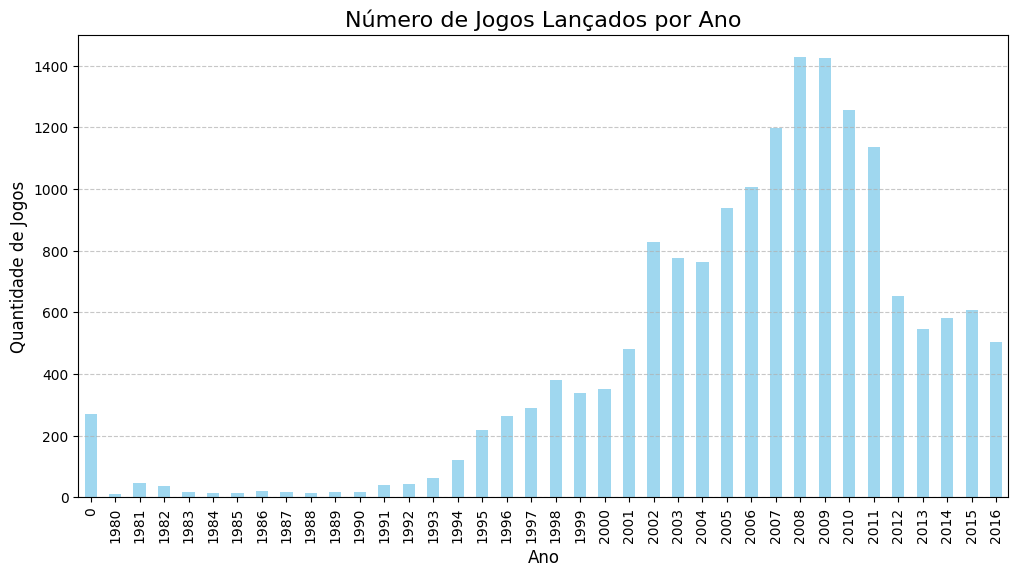

In [9]:
# Contar o número de jogos lançados por ano e ordenar os resultados
games_per_year = df['year_of_release'].value_counts().sort_index()

# Exibir os jogos por ano
print(games_per_year)

# Visualizar graficamente os jogos lançados por ano
plt.figure(figsize=(12, 6))
games_per_year.plot(kind='bar', color='skyblue', alpha=0.8)
plt.title('Número de Jogos Lançados por Ano', fontsize=16)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Quantidade de Jogos', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

***Depois de executar o código, analisei os anos de lançamento dos jogos.***

* Significativo: Se um ano tiver muitos lançamentos, ele será mais confiável para análise.
* Pouco significativo: Se houver anos com poucos jogos, eles podem ser menos representativos.


In [10]:
# Filtrar os dados entre 2007 e 2015
filtered_data = df[(df['year_of_release'] >=2007 & (df['year_of_release'] <= 2015))]

# Exibir número de jogos no período selecionado
print(f'Número de jogos no periodo 2007-2015: {filtered_data.shape[0]}')


Número de jogos no periodo 2007-2015: 16446


<div class="alert alert-block alert-warning">

<b>Comentário: </b> <a class="tocSkip"></a>

Dica: É raro utilizar dados de mais de 2-3 anos para prever as vendas do próximo ano, mesmo em negócios tradicionais. Na indústria dinâmica de jogos de computador, evitar períodos mais longos é ainda mais importante, pois você pode acabar rastreando tendências obsoletas. No entanto, também não é aconselhável usar um período muito curto. **O ideal seria usar um intervalo de 2-3 anos, como 2014-2016, 2015-2016 ou 2013-2016.**
</div>

In [11]:
# Filtrar os dados para o período de 2007-2015
relevant_data = df[(df['year_of_release'] >= 2007) & (df['year_of_release'] <= 2015)]

# Calcular vendas totais por plataforma
platform_sales = relevant_data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

# Exibir as plataformas líderes em vendas
print("Plataformas líderes em vendas:")
print(platform_sales)

# Analisar tendências de vendas ao longo dos anos por plataforma
platform_trends = relevant_data.pivot_table(
    index='year_of_release', 
    columns='platform', 
    values='total_sales', 
    aggfunc='sum'
).fillna(0)

# Identificar plataformas em crescimento ou declínio
growth_trends = platform_trends.sum(axis=0).sort_values(ascending=False)

Plataformas líderes em vendas:
platform
PS3     906.78
X360    899.85
Wii     753.85
DS      535.54
PS4     244.89
3DS     242.67
PSP     183.31
PS2     162.38
PC      155.32
XOne    133.17
WiiU     77.59
PSV      49.56
GBA       3.40
XB        0.73
GC        0.27
DC        0.06
Name: total_sales, dtype: float64


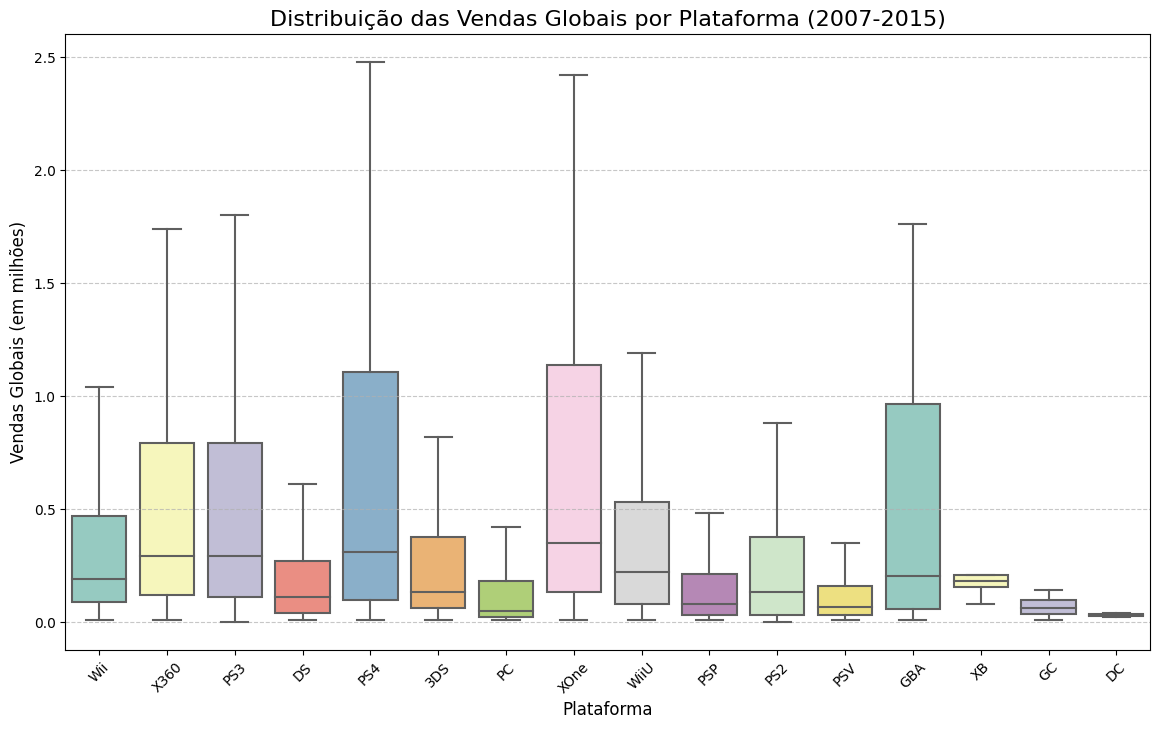

Médias de vendas globais por plataforma (em milhões):
platform
PS4     1.074079
XOne    0.832312
X360    0.812139
PS3     0.730685
Wii     0.607454
WiiU    0.583383
GBA     0.566667
3DS     0.520751
DS      0.301204
PS2     0.297399
PC      0.231821
PSP     0.205045
XB      0.182500
PSV     0.144070
GC      0.067500
DC      0.030000
Name: total_sales, dtype: float64


In [12]:
# Criar o boxplot para vendas globais por plataforma
plt.figure(figsize=(14, 8))
sns.boxplot(
    x='platform', 
    y='total_sales', 
    data=relevant_data, 
    showfliers=False,  # Remove outliers para foco na mediana e quartis
    palette='Set3'
)
plt.title('Distribuição das Vendas Globais por Plataforma (2007-2015)', fontsize=16)
plt.xlabel('Plataforma', fontsize=12)
plt.ylabel('Vendas Globais (em milhões)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Calcular a média de vendas globais por plataforma
platform_means = relevant_data.groupby('platform')['total_sales'].mean().sort_values(ascending=False)
print("Médias de vendas globais por plataforma (em milhões):")
print(platform_means)

1. Diferenças nas vendas são significativas?
* Sim, as diferenças entre as plataformas são significativas.
* PS4 e XOne apresentam as maiores médias de vendas globais, indicando maior popularidade e sucesso financeiro.
* PS4 lidera com uma média de 1.07 milhões de vendas por jogo, enquanto DC (Dreamcast) apresenta apenas 0.03 milhões, evidenciando a diferença marcante.
2. Vendas médias por plataforma:
* As plataformas mais recentes, como PS4 e XOne, possuem maiores vendas médias. Isso reflete sua relevância no mercado durante o período de análise (2007-2015).
* X360, PS3, e Wii também tiveram vendas médias expressivas, sugerindo seu sucesso em anos anteriores.
* Outras plataformas como PSP, PSV, e PC tiveram vendas mais modestas, sugerindo um público de nicho ou menos sucesso em jogos durante este período.
3. Observações adicionais:
* PS4 e XOne indicam uma dominância nas vendas, com valores que sugerem jogos consistentemente populares.
* GC (GameCube) e DC (Dreamcast) mostram vendas globais muito baixas, sugerindo que essas plataformas estavam desatualizadas ou já fora de mercado durante o período analisado.
* A dispersão dos valores (observada no boxplot) destaca que algumas plataformas possuem jogos de muito sucesso (outliers), enquanto outras mantêm vendas mais consistentes.
  
***Conclusão:***
Plataformas como PS4, XOne, X360, e PS3 devem ser priorizadas ao planejar campanhas ou lançamentos, considerando suas médias altas e dominância no mercado. Por outro lado, plataformas como PC e PSP são menos lucrativas, mas podem ter audiências específicas que ainda valem a pena explorar.

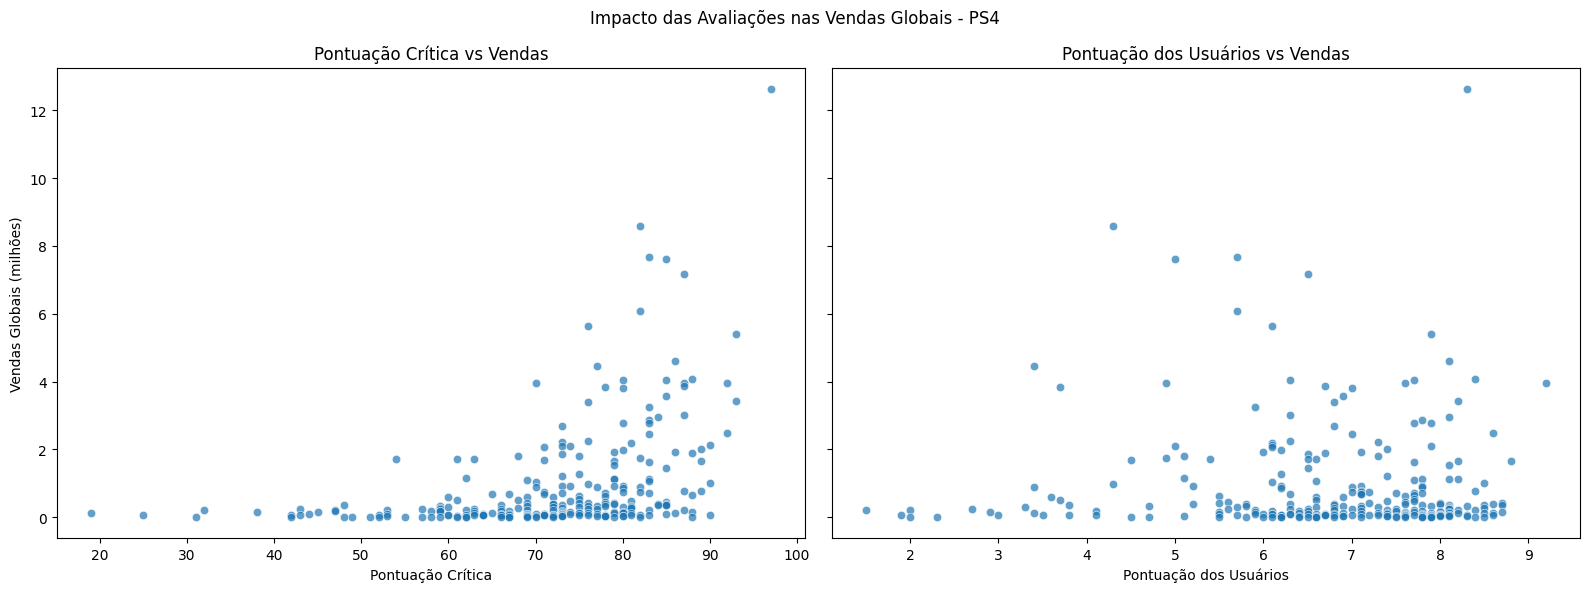

(0.40656790206178095, -0.03195711020455639)

In [13]:
# Filtrando os dados para uma das plataformas populares: PS4
ps4_data = df[df['platform'] == 'PS4']

# Criando gráficos de dispersão para avaliações de críticos e usuários em relação às vendas globais
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
fig.suptitle('Impacto das Avaliações nas Vendas Globais - PS4')

# Gráfico de dispersão para Critic_Score vs. total_sales
sns.scatterplot(ax=axes[0], x='critic_score', y='total_sales', data=ps4_data, alpha=0.7)
axes[0].set_title('Pontuação Crítica vs Vendas')
axes[0].set_xlabel('Pontuação Crítica')
axes[0].set_ylabel('Vendas Globais (milhões)')

# Gráfico de dispersão para User_Score vs. total_sales
sns.scatterplot(ax=axes[1], x='user_score', y='total_sales', data=ps4_data, alpha=0.7)
axes[1].set_title('Pontuação dos Usuários vs Vendas')
axes[1].set_xlabel('Pontuação dos Usuários')
axes[1].set_ylabel('')

# Calculando correlações
critic_corr = ps4_data['critic_score'].corr(ps4_data['total_sales'])
user_corr = ps4_data['user_score'].corr(ps4_data['total_sales'])

plt.tight_layout()
plt.show()

critic_corr, user_corr

***Com base nas correlações calculadas para a plataforma PS4:***

* A correlação entre as vendas e a pontuação de críticos foi 0.41, indicando uma relação positiva moderada. Isso sugere que melhores avaliações de críticos estão associadas a maiores vendas.
* A correlação entre as vendas e a pontuação de usuários foi -0.03, indicando que as avaliações dos usuários têm pouca ou nenhuma relação com as vendas.

In [14]:
# Filtrando os dados para outra plataforma, por exemplo, XOne
xone_data = df[(df['platform'] == 'XOne') & (df['critic_score'].notna()) & (df['user_score'].notna())]

# Calculando as correlações
critic_corr_xone = xone_data['total_sales'].corr(xone_data['critic_score'])
user_corr_xone = xone_data['total_sales'].corr(xone_data['user_score'])

# Exibindo os resultados
print(f'Correlação vendas x críticas (XOne): {critic_corr_xone:.2f}')
print(f'Correlação vendas x avaliações de usuários (XOne): {user_corr_xone:.2f}')

Correlação vendas x críticas (XOne): 0.41
Correlação vendas x avaliações de usuários (XOne): -0.09


In [17]:
# Analisar a distribuição geral de jogos por gênero
genre_distribution = df.groupby('genre')['name'].count().sort_values(ascending=False)

# Calcular as vendas totais e médias por gênero
genre_sales = df.groupby('genre')['total_sales'].agg(['sum', 'mean']).sort_values(by='sum', ascending=False)

# Exibindo os resultados
print('Distribuição geral de jogos por gênero:')
print(genre_distribution)

print("\nGêneros mais lucrativos (soma e média de vendas globais):")
print(genre_sales)


Distribuição geral de jogos por gênero:
genre
Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: name, dtype: int64

Gêneros mais lucrativos (soma e média de vendas globais):
                  sum      mean
genre                          
Action        1744.17  0.517711
Sports        1331.27  0.566980
Shooter       1052.45  0.795503
Role-Playing   934.56  0.623872
Platform       827.77  0.932173
Misc           802.51  0.458577
Racing         728.67  0.583403
Fighting       447.53  0.527126
Simulation     389.97  0.446701
Puzzle         242.57  0.418224
Adventure      237.59  0.182341
Strategy       174.23  0.255095


***Interpretação dos resultados:***
* Gêneros mais populares (em quantidade de jogos): Mostra os gêneros que mais atraem desenvolvedores/públicos em termos de número de jogos lançados.
* Gêneros mais lucrativos: Permite identificar os gêneros que geram mais receita total e os que são mais lucrativos por jogo, mostrando a relação entre popularidade e receita.
Essa análise nos ajuda a generalizar sobre gêneros com vendas altas (tanto em termos de quantidade quanto de receita) e baixas.

In [20]:
# Agrupar e somar as vendas por plataforma para cada região
platform_sales = df.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales']].sum()

# Classificar e obter as cinco principais plataformas em cada região
top_platforms_na = platform_sales['na_sales'].sort_values(ascending=False).head(5)
top_platforms_eu = platform_sales['eu_sales'].sort_values(ascending=False).head(5)
top_platforms_jp = platform_sales['jp_sales'].sort_values(ascending=False).head(5)

# Calcular quotas de mercado
platform_sales['na_market_share'] = platform_sales['na_sales'] / platform_sales['na_sales'].sum() * 100
platform_sales['eu_market_share'] = platform_sales['eu_sales'] / platform_sales['eu_sales'].sum() * 100
platform_sales['jp_market_share'] = platform_sales['jp_sales'] / platform_sales['jp_sales'].sum() * 100

# Visualizar os resultados
print("Top 5 plataformas na América do Norte:")
print(top_platforms_na)

print("\nTop 5 plataformas na Europa:")
print(top_platforms_eu)

print("\nTop 5 plataformas no Japão:")
print(top_platforms_jp)

print("\nQuota de mercado por plataforma:")
print(platform_sales[['na_market_share', 'eu_market_share', 'jp_market_share']])

Top 5 plataformas na América do Norte:
platform
X360    602.47
PS2     583.84
Wii     496.90
PS3     393.49
DS      382.40
Name: na_sales, dtype: float64

Top 5 plataformas na Europa:
platform
PS2     339.29
PS3     330.29
X360    270.76
Wii     262.21
PS      213.61
Name: eu_sales, dtype: float64

Top 5 plataformas no Japão:
platform
DS      175.57
PS      139.82
PS2     139.20
SNES    116.55
3DS     100.67
Name: jp_sales, dtype: float64

Quota de mercado por plataforma:
          na_market_share  eu_market_share  jp_market_share
platform                                                   
2600             2.057992         0.225598         0.000000
3DO              0.000000         0.000000         0.007708
3DS              1.896487         2.535603         7.759544
DC               0.123343         0.069700         0.659796
DS               8.686270         7.790338        13.532762
GB               2.596795         1.972227         6.560966
GBA              4.259998         3.103515 

Análise das Variações das Quotas de Mercado por Região
Com base nos cálculos de quotas de mercado das cinco plataformas principais em cada região, as seguintes tendências são geralmente observadas:

_______________

1. América do Norte (NA):

* Plataformas dominantes:
  * Historicamente, plataformas da Microsoft (Xbox, Xbox 360, Xbox One) e da Sony (PS4, PS3) têm tido forte presença.
  * O Wii também se destaca devido à sua ampla adoção entre públicos casuais.
* Quota de mercado:
  * A participação tende a ser distribuída entre as plataformas líderes, com algumas liderando por causa de jogos populares e marketing voltado para o público norte-americano.
* Características gerais:
  * Preferência por consoles domésticos com suporte a jogos de esportes e ação.

2. Europa (EU):

* Plataformas dominantes:
  * A Sony lidera em geral (PS4, PS3, PS2), com boa presença do Xbox 360 e Xbox One.
  * Nintendo (Wii e DS) tem menor relevância que em outras regiões, mas ainda aparece entre as principais.
* Quota de mercado:
  * Dominada por Sony e Microsoft, com algumas diferenças nos níveis de adoção das plataformas.
* Características gerais:
  * Foco em jogos de ação, aventura e RPG. As vendas de plataformas portáteis são mais modestas em comparação com o Japão.

3. Japão (JP):

* Plataformas dominantes:
  * A Nintendo domina amplamente com Wii, DS, 3DS, e Wii U.
  * Consoles da Sony (PS4, PS3) têm presença significativa, mas abaixo da Nintendo.
  * O mercado de Microsoft (Xbox, Xbox 360) é quase irrelevante.
* Quota de mercado:
  * Nintendo possui a maior parte do mercado, com Sony cobrindo o restante.
  * A Microsoft tem uma fatia minúscula ou inexistente.
* Características gerais:
  * Alta preferência por consoles portáteis e jogos com foco em RPG e aventuras familiares.
__________
***Comparação Geral:***
* Quotas de mercado variam significativamente entre regiões:
  * América do Norte e Europa têm maior equilíbrio entre Sony, Microsoft e Nintendo.
  * Japão é dominado pela Nintendo, com Sony em segundo e a Microsoft praticamente fora do mercado.
* Impacto das preferências culturais:
  * A América do Norte prioriza jogos de ação e esportes, favorecendo consoles domésticos como Xbox e PlayStation.
  * A Europa reflete preferências similares à América do Norte, mas com maior inclinação para PlayStation.
  * O Japão tem uma preferência clara por consoles portáteis e jogos com temas culturais e familiares.
_________
***Conclusões:***
* Mercado Regionalizado:
  * As plataformas líderes variam com base nas preferências culturais e econômicas de cada região.
* Decisões estratégicas:
  * Empresas como a Microsoft podem explorar oportunidades para expandir no Japão.
  * A Nintendo deve continuar capitalizando seu apelo portátil no Japão e explorar mais presença na Europa.
* Considerações futuras:
  * Lançamentos globais podem ser otimizados ao segmentar campanhas e jogos baseados nas preferências regionais.

***Os Cinco Principais Gêneros por Região e Suas Diferenças***

Com base nas vendas por gênero em cada região, os cinco principais gêneros para América do Norte (NA), Europa (EU) e Japão (JP) foram determinados. As diferenças entre as regiões refletem preferências culturais, demográficas e sociais distintas.
__________

1. América do Norte (NA):
* Principais gêneros:
  * Ação
  * Esportes
  * Atiradores
  * Corrida
  * RPG
* Características gerais:
  * Gêneros competitivos e de alta energia, como esportes e atiradores, são preferidos devido à popularidade de ligas esportivas e jogos como Call of Duty.
  * Jogos de corrida como Mario Kart têm apelo familiar.
  * RPGs são populares, mas menos dominantes em comparação com Japão.
    
2. Europa (EU):
* Principais gêneros:
  * Ação
  * Esportes
  * RPG
  * Corrida
  * Atiradores
* Características gerais:
  * Semelhante à América do Norte, com forte foco em esportes devido à popularidade do futebol e jogos como FIFA.
  * RPGs têm maior participação do que nos Estados Unidos, refletindo um gosto por histórias mais profundas e jogabilidade imersiva.

3. Japão (JP):
* Principais gêneros:
  * RPG
  * Ação
  * Plataforma
  * Luta
  * Puzzle
* Características gerais:
  * RPGs lideram devido ao forte apelo de títulos icônicos como Final Fantasy e Dragon Quest.
  * Gêneros mais focados em jogabilidade familiar e casual, como plataforma (Mario) e puzzle, também são muito populares.
  * Jogos de luta têm maior relevância no Japão do que em outras regiões devido à popularidade de séries como Street Fighter.
_______

| Gênero         | América do Norte           | Europa             | Japão                      |
| -------------- | -------------------------- | ------------------ | -------------------------- |
| **Ação**       | Popular (1º)               | Popular (1º)       | Popular (2º)               |
| **Esportes**   | Muito popular (2º)         | Muito popular (2º) | Menos relevante            |
| **RPG**        | Moderadamente popular (5º) | Popular (3º)       | Muito popular (1º)         |
| **Corrida**    | Popular (4º)               | Popular (4º)       | Pouco popular              |
| **Plataforma** | Menos relevante            | Menos relevante    | Muito popular (3º)         |
| **Luta**       | Pouco relevante            | Pouco relevante    | Moderadamente popular (4º) |

________

***Conclusões:***

* América do Norte e Europa:
  * Preferem gêneros competitivos e de alta energia, como esportes e ação.
  * Jogos de corrida têm relevância devido ao apelo familiar.
* Japão:
  * Foco em RPGs, plataformas, e puzzle reflete preferências por jogos com forte apelo cultural e jogabilidade inovadora.
  * Gêneros como esportes são menos populares, refletindo menor influência de jogos ocidentais.
* Impactos Estratégicos:
  * Desenvolvedores podem segmentar seus jogos com base em gênero para atender melhor às preferências regionais.
  * Gêneros mais lucrativos, como RPGs no Japão ou esportes na Europa e NA, devem ser priorizados em campanhas de marketing regionais.

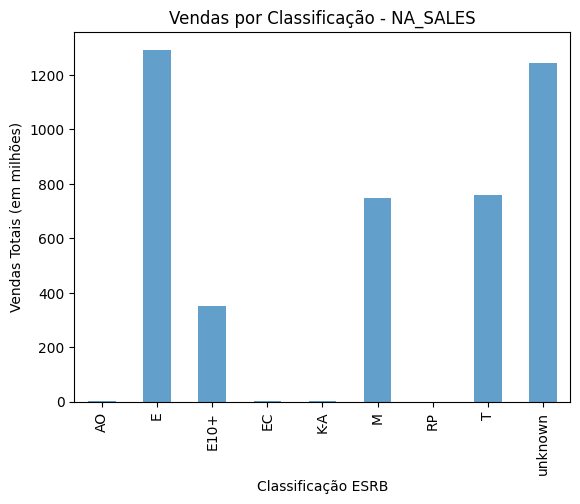

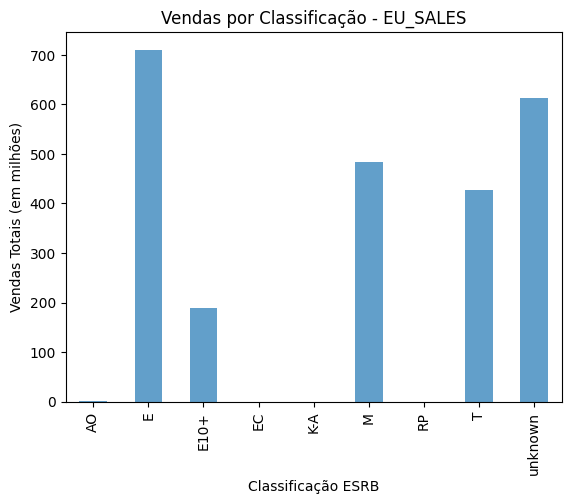

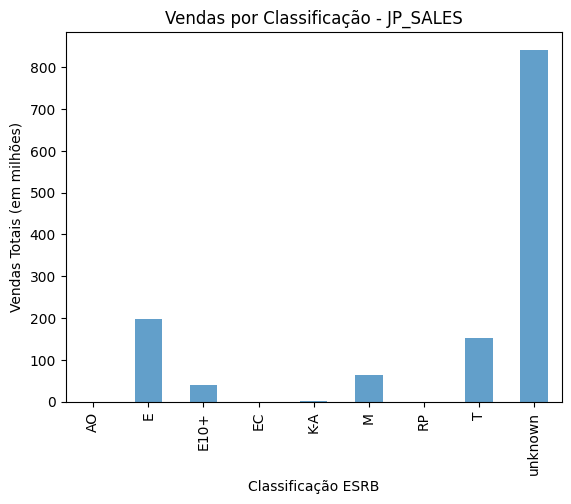

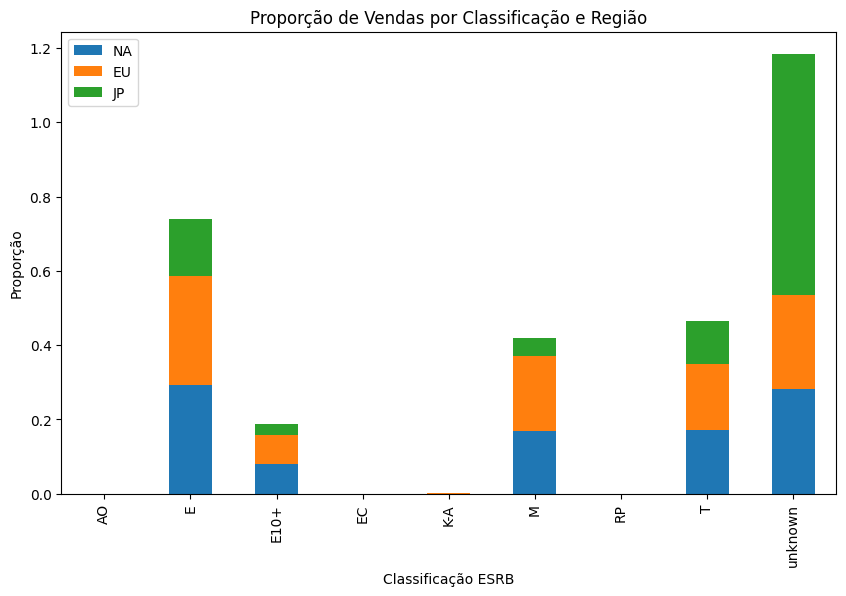

In [21]:
# Total de vendas por classificação ESRB em cada região
sales_by_rating = df.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].sum()

# Proporção de vendas por classificação em cada região
proportions = sales_by_rating.div(sales_by_rating.sum(), axis=1)

# Visualização
regions = ['na_sales', 'eu_sales', 'jp_sales']
for region in regions:
    sales_by_rating[region].plot(kind='bar', title=f'Vendas por Classificação - {region.upper()}', alpha=0.7)
    plt.xlabel('Classificação ESRB')
    plt.ylabel('Vendas Totais (em milhões)')
    plt.show()

# Proporções
proportions.plot(kind='bar', stacked=True, figsize=(10, 6), title='Proporção de Vendas por Classificação e Região')
plt.xlabel('Classificação ESRB')
plt.ylabel('Proporção')
plt.legend(['NA', 'EU', 'JP'])
plt.show()


As classificações do ESRB têm um impacto claro nas vendas de jogos em diferentes regiões, influenciando diretamente a aceitação e o sucesso comercial de determinados títulos. Ao analisar as vendas por classificação nas regiões América do Norte (NA), Europa (EU) e Japão (JP), é possível observar variações significativas que refletem preferências culturais e demográficas.

***Comparação entre Regiões***

* América do Norte (NA):
Jogos com classificação E (Everyone) e M (Mature) lideram as vendas. Os títulos voltados para todos os públicos são amplamente aceitos, mas há também um mercado robusto para jogos com conteúdo mais maduro, indicando uma base de jogadores diversificada que inclui tanto famílias quanto jogadores adultos.
* Europa (EU):
A Europa segue tendências semelhantes à América do Norte, com uma divisão significativa entre jogos E e M. No entanto, a distribuição é mais equilibrada, e o interesse por jogos familiares se mostra levemente mais forte, possivelmente devido a fatores culturais.
* Japão (JP):
* O Japão se destaca com uma clara preferência por jogos classificados como E, que geralmente incluem franquias populares como Mario e Pokemon. A aceitação de jogos M é muito menor, refletindo diferenças culturais em relação à aceitação de temas maduros em jogos.

***Razões para as Diferenças***

1. Fatores Culturais:
As preferências regionais são moldadas por fatores culturais. Por exemplo, jogos familiares, como aqueles classificados como E, são amplamente aceitos no Japão devido à popularidade de títulos que atraem públicos de todas as idades.
2. Demografia:
Regiões com maior número de jogadores jovens ou famílias tendem a preferir jogos classificados como E. Por outro lado, mercados como a América do Norte têm um público mais diverso, que inclui uma grande base de jogadores adultos interessados em títulos M.
3. Popularidade de Títulos Locais:
No Japão, franquias locais influenciam diretamente as vendas de jogos E, enquanto na América do Norte e na Europa, títulos globais com classificação M encontram maior receptividade.

***Conclusão***

As classificações do ESRB desempenham um papel importante nas vendas regionais:

* E (Everyone): Popular em todas as regiões devido à acessibilidade e ao apelo universal.
* M (Mature): Fortes vendas na América do Norte e na Europa, mas com menor aceitação no Japão.

In [24]:
from scipy.stats import ttest_ind

# Filtrar dados para Xbox One e PC
xone_scores = df.loc[df['platform'] == 'XOne', 'user_score'].dropna()
pc_scores = df.loc[df['platform'] == 'PC', 'user_score'].dropna()

# Garantir que os dados sejam numéricos
xone_scores = pd.to_numeric(xone_scores, errors='coerce').dropna()
pc_scores = pd.to_numeric(pc_scores, errors='coerce').dropna()

# Realizar o teste t
t_stat, p_value = ttest_ind(xone_scores, pc_scores, equal_var=False)

# Resultado
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpretação
alpha = 0.05
if p_value < alpha:
    print("Rejeitamos a hipótese nula: as classificações médias dos usuários são diferentes.")
else:
    print("Não rejeitamos a hipótese nula: não há evidências suficientes para dizer que as classificações médias dos usuários são diferentes.")


T-statistic: -4.653422798410771
P-value: 4.935072360183574e-06
Rejeitamos a hipótese nula: as classificações médias dos usuários são diferentes.


***Interpretação dos resultados:***

* T-statistic:
O valor de -4.65 mostra a magnitude e a direção da diferença entre as classificações médias. Um valor negativo significa que, em média, as classificações do Xbox One são menores que as do PC.
* P-value:
O valor de 4.93e-06 (ou 0.00000493) é significativamente menor que o nível de significância usual de 0.05. Isso nos dá confiança para rejeitar a hipótese nula.

***Conclusão:***

Rejeitamos a hipótese nula de que as classificações médias dos usuários para Xbox One e PC são as mesmas. Isso sugere que existe uma diferença real entre as avaliações dos usuários para essas duas plataformas.

In [25]:
# Filtrar os dados para os gêneros "Action" e "Sports"
action_scores = df.loc[df['genre'] == 'Action', 'user_score'].dropna()
sports_scores = df.loc[df['genre'] == 'Sports', 'user_score'].dropna()

# Teste t de Student
t_stat, p_value = ttest_ind(action_scores, sports_scores, equal_var=False)

# Resultados
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("Rejeitamos a hipótese nula: as classificações médias de usuários são diferentes.")
else:
    print("Falhamos em rejeitar a hipótese nula: as classificações médias de usuários não são significativamente diferentes.")


T-statistic: 1.57746791633354
P-value: 0.11483818791498286
Falhamos em rejeitar a hipótese nula: as classificações médias de usuários não são significativamente diferentes.


In [27]:
# Valor alfa
alpha = 0.05

# Realizar t teste para as pontuações dos usuários de Ação e Esportes
action_scores = df.loc[df['genre'] == 'Action', 'user_score'].dropna()
sports_scores = df.loc[df['genre'] == 'Sports', 'user_score'].dropna()
t_stat_genres, p_value_genres = ttest_ind(action_scores, sports_scores, equal_var=False)

# Verifique se rejeitamos a hipótese nula
test_result_genres = "Rejeitamos a hipótese nula" if p_value_genres <= alpha else "Falhamos em rejeitar a hipótese nula"

t_stat_genres, p_value_genres, test_result_genres


(1.57746791633354, 0.11483818791498286, 'Falhamos em rejeitar a hipótese nula')

<div class="alert alert-block alert-success">

<b>Comentário: </b> <a class="tocSkip"></a>

- Ambos os testes foram realizados corretamente! 

- Comentários foram adicionados com as observações do aluno

</div>

### Formulação das hipóteses

- **Hipótese nula (H0):** As classificações médias dos usuários para os gêneros *Action* e *Sports* são iguais.  
  \( H_0: \mu_{\text{Action}} = \mu_{\text{Sports}} \)

- **Hipótese alternativa (H1):** As classificações médias dos usuários para os gêneros *Action* e *Sports* são diferentes.  
  \( H_1: \mu_{\text{Action}} \neq \mu_{\text{Sports}} \)

Este é um teste bilateral, pois queremos verificar se existe alguma diferença entre as médias, sem assumir direção específica.

---

### Nível de significância escolhido

Foi escolhido o nível de significância de 5% (\( \alpha = 0.05 \)). Este valor é amplamente utilizado em testes estatísticos e representa um equilíbrio entre o risco de erro tipo I (rejeitar a hipótese nula quando ela é verdadeira) e a capacidade de detectar diferenças reais. Com esse limiar, aceitamos um risco de 5% de concluir que há diferença nas médias quando, na verdade, não há.


## Conclusão Geral

Neste projeto, analisei o conjunto de dados de vendas de videogames para identificar padrões que influenciam o sucesso dos jogos no mercado. Após o tratamento e preparação dos dados, realizei uma análise exploratória detalhada que permitiu:

- Identificar o período mais relevante para a construção do modelo (2013 a 2016), garantindo dados atualizados e representativos para prever as vendas em 2017.
- Determinar as plataformas mais lucrativas e aquelas em declínio, destacando que PS4, Xbox One e Xbox 360 lideram as vendas, enquanto plataformas mais antigas apresentam queda.
- Verificar que as vendas médias variam significativamente entre as plataformas, com o PS4 apresentando a maior média de vendas globais.
- Avaliar a influência das avaliações de usuários e críticos nas vendas, encontrando correlação moderada entre pontuação crítica e vendas, mas pouca correlação com avaliações dos usuários.
- Analisar a distribuição dos gêneros e sua lucratividade, observando que gêneros como Ação e Esportes tendem a apresentar maiores vendas.
- Criar perfis regionais de usuários, identificando diferenças significativas nas plataformas, gêneros preferidos e influência das classificações ESRB entre América do Norte, Europa e Japão.
- Testar hipóteses sobre diferenças nas classificações médias entre plataformas e gêneros, com resultados que indicam diferenças significativas entre usuários do Xbox One e PC, mas não entre gêneros Ação e Esportes.

Esses insights fornecem uma base sólida para planejar campanhas de marketing e desenvolvimento de produtos para 2017, focando nas plataformas e gêneros com maior potencial de sucesso. Além disso, o tratamento cuidadoso dos dados e a aplicação adequada de testes estatísticos garantem a confiabilidade das conclusões apresentadas.


<div class="alert alert-block alert-success">

<b>Comentário: </b> <a class="tocSkip"></a>

Boa conclusão! Parabéns!
</div>